In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

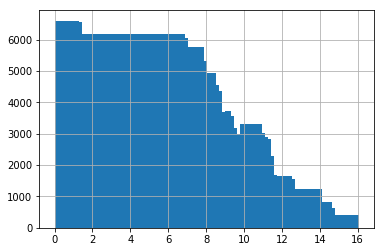

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
rawydf=ydf


In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


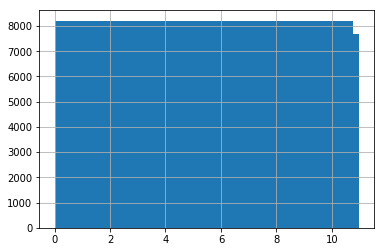

In [26]:
align_q(11).hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [29]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=400
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/400'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [34]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [35]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [36]:
best_mae=1e10

In [37]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [38]:
best={'colsample_bytree': 0.5047851370096611,
 'learning_rate': 0.001623327998143825,
 'max_depth': 3.620081401210768,
 'min_data_in_leaf': 5.006595576560673,
 'min_sum_hessian_in_leaf': 0.0007950517311813728,
 'num_leaves': 60.08234368141781,
 'reg_alpha': 2.918236416019113,
 'reg_lambda': 1.1799851577913918,
 'subsample': 0.35313520995679815}

In [40]:
scores={}
for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        best['seed']=randseed
        a=lgbcv(**best)
        ascores.append(a)
    scores[targetno]=ascores

valid quake 1
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.32616	valid_1's l1: 2.37379
[200]	training's l1: 1.86455	valid_1's l1: 1.94178
[300]	training's l1: 1.55138	valid_1's l1: 1.63381
[400]	training's l1: 1.38544	valid_1's l1: 1.50973
[500]	training's l1: 1.30748	valid_1's l1: 1.47231
[600]	training's l1: 1.25078	valid_1's l1: 1.44449
[700]	training's l1: 1.20829	valid_1's l1: 1.41934
[800]	training's l1: 1.17656	valid_1's l1: 1.39797
[900]	training's l1: 1.15181	valid_1's l1: 1.38117
[1000]	training's l1: 1.13271	valid_1's l1: 1.36376
[1100]	training's l1: 1.1181	valid_1's l1: 1.34954
[1200]	training's l1: 1.10618	valid_1's l

[400]	training's l1: 1.43559	valid_1's l1: 1.76125
[500]	training's l1: 1.34206	valid_1's l1: 1.72418
[600]	training's l1: 1.28811	valid_1's l1: 1.69229
[700]	training's l1: 1.24531	valid_1's l1: 1.6643
[800]	training's l1: 1.21222	valid_1's l1: 1.63936
[900]	training's l1: 1.18604	valid_1's l1: 1.618
[1000]	training's l1: 1.16493	valid_1's l1: 1.60172
[1100]	training's l1: 1.14841	valid_1's l1: 1.58866
[1200]	training's l1: 1.13524	valid_1's l1: 1.5786
[1300]	training's l1: 1.12382	valid_1's l1: 1.56917
[1400]	training's l1: 1.11426	valid_1's l1: 1.56235
[1500]	training's l1: 1.10584	valid_1's l1: 1.55487
[1600]	training's l1: 1.0984	valid_1's l1: 1.54922
[1700]	training's l1: 1.09178	valid_1's l1: 1.54418
[1800]	training's l1: 1.08603	valid_1's l1: 1.54157
[1900]	training's l1: 1.0808	valid_1's l1: 1.53802
[2000]	training's l1: 1.07594	valid_1's l1: 1.53528
[2100]	training's l1: 1.07126	valid_1's l1: 1.53373
[2200]	training's l1: 1.06645	valid_1's l1: 1.53256
[2300]	training's l1: 1.

(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34477	valid_1's l1: 2.29643
[200]	training's l1: 1.89712	valid_1's l1: 1.76802
[300]	training's l1: 1.59056	valid_1's l1: 1.43343
[400]	training's l1: 1.42073	valid_1's l1: 1.27052
[500]	training's l1: 1.34909	valid_1's l1: 1.19983
[600]	training's l1: 1.29661	valid_1's l1: 1.14847
[700]	training's l1: 1.2555	valid_1's l1: 1.11144
[800]	training's l1: 1.22283	valid_1's l1: 1.08799
[900]	training's l1: 1.19665	valid_1's l1: 1.07005
[1000]	training's l1: 1.17658	valid_1's l1: 1.05661
[1100]	training's l1: 1.16148	valid_1's l1: 1.04661
[1200]	training's l1: 1.14924	valid_1's l1: 1.03901
[1300]	training's l1: 1.13846	valid_1's l1: 1.03423
[1400]	training's l1: 1.12912	valid_1's l1: 1.03057
[1500]	training's l1: 1.1209	valid_1's l1: 1.0268
[1600]	training's l1: 1.11367	valid_1's l1: 1.02308
[1700]	training's l1: 1.10744	valid_1's l1: 1.02039
[1800]	training's l

[3100]	training's l1: 1.03768	valid_1's l1: 1.23865
[3200]	training's l1: 1.03433	valid_1's l1: 1.23753
[3300]	training's l1: 1.03098	valid_1's l1: 1.23655
[3400]	training's l1: 1.02775	valid_1's l1: 1.23514
[3500]	training's l1: 1.02452	valid_1's l1: 1.2341
[3600]	training's l1: 1.0213	valid_1's l1: 1.23327
[3700]	training's l1: 1.01788	valid_1's l1: 1.23276
Early stopping, best iteration is:
[3690]	training's l1: 1.01825	valid_1's l1: 1.2326
write to /home/hadoop/lanlep2019/input/sub/400/2/sub400_q13_at_s2339343.csv
quake  13 (1.2326025743703772, 3690)
valid quake 14
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.40119	valid_1's l1

[2300]	training's l1: 1.07236	valid_1's l1: 1.01355
[2400]	training's l1: 1.06811	valid_1's l1: 1.01123
[2500]	training's l1: 1.064	valid_1's l1: 1.00949
[2600]	training's l1: 1.06026	valid_1's l1: 1.0073
[2700]	training's l1: 1.05657	valid_1's l1: 1.00604
[2800]	training's l1: 1.05281	valid_1's l1: 1.00494
[2900]	training's l1: 1.04918	valid_1's l1: 1.00351
[3000]	training's l1: 1.04545	valid_1's l1: 1.00185
[3100]	training's l1: 1.04197	valid_1's l1: 1.00087
[3200]	training's l1: 1.03846	valid_1's l1: 1.00027
[3300]	training's l1: 1.03513	valid_1's l1: 1.00035
Early stopping, best iteration is:
[3206]	training's l1: 1.03829	valid_1's l1: 1.0001
write to /home/hadoop/lanlep2019/input/sub/400/2/sub400_q3_at_s7741519.csv
quake  3 (1.0000952589272598, 3206)
valid quake 4
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.3216591253

7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.39383	valid_1's l1: 2.46758
[200]	training's l1: 1.96581	valid_1's l1: 2.13647
[300]	training's l1: 1.64077	valid_1's l1: 1.94536
[400]	training's l1: 1.43111	valid_1's l1: 1.8806
[500]	training's l1: 1.33628	valid_1's l1: 1.8815
Early stopping, best iteration is:
[418]	training's l1: 1.40545	valid_1's l1: 1.87694
write to /home/hadoop/lanlep2019/input/sub/400/2/sub400_q8_at_s7741519.csv
quake  8 (1.8769438338400737, 418)
valid quake 9
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(3

[2500]	training's l1: 1.06272	valid_1's l1: 1.12519
[2600]	training's l1: 1.05892	valid_1's l1: 1.12311
[2700]	training's l1: 1.05536	valid_1's l1: 1.12164
[2800]	training's l1: 1.05185	valid_1's l1: 1.12098
[2900]	training's l1: 1.04826	valid_1's l1: 1.1186
[3000]	training's l1: 1.04489	valid_1's l1: 1.11771
[3100]	training's l1: 1.04145	valid_1's l1: 1.11697
[3200]	training's l1: 1.03808	valid_1's l1: 1.11637
[3300]	training's l1: 1.0348	valid_1's l1: 1.11622
[3400]	training's l1: 1.03124	valid_1's l1: 1.11528
[3500]	training's l1: 1.02772	valid_1's l1: 1.11439
[3600]	training's l1: 1.0245	valid_1's l1: 1.11346
[3700]	training's l1: 1.02118	valid_1's l1: 1.11327
[3800]	training's l1: 1.01811	valid_1's l1: 1.11274
[3900]	training's l1: 1.01478	valid_1's l1: 1.11192
[4000]	training's l1: 1.01158	valid_1's l1: 1.11114
[4100]	training's l1: 1.00859	valid_1's l1: 1.11033
[4200]	training's l1: 1.0053	valid_1's l1: 1.1096
[4300]	training's l1: 1.00245	valid_1's l1: 1.10902
Early stopping, b

write to /home/hadoop/lanlep2019/input/sub/400/3/sub400_q1_at_s4345368.csv
quake  1 (0.7824085906612812, 2581)
valid quake 2
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.44728	valid_1's l1: 1.52261
[200]	training's l1: 1.19077	valid_1's l1: 1.31316
[300]	training's l1: 0.998029	valid_1's l1: 1.13308
[400]	training's l1: 0.872805	valid_1's l1: 0.994704
[500]	training's l1: 0.8108	valid_1's l1: 0.931472
[600]	training's l1: 0.778207	valid_1's l1: 0.899723
[700]	training's l1: 0.752338	valid_1's l1: 0.876712
[800]	training's l1: 0.731563	valid_1's l1: 0.861193
[900]	training's l1: 0.715287	valid_1's l1: 0.848955
[1000]	traini

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.44592	valid_1's l1: 1.4761
[200]	training's l1: 1.18682	valid_1's l1: 1.23724
[300]	training's l1: 0.989034	valid_1's l1: 1.10368
[400]	training's l1: 0.864328	valid_1's l1: 1.02417
[500]	training's l1: 0.810226	valid_1's l1: 0.991411
[600]	training's l1: 0.777997	valid_1's l1: 0.967667
[700]	training's l1: 0.752072	valid_1's l1: 0.95164
[800]	training's l1: 0.731998	valid_1's l1: 0.939363
[900]	training's l1: 0.716167	valid_1's l1: 0.931151
[1000]	training's l1: 0.703408	valid_1's l1: 0.925172
[1100]	training's l1: 0.693612	valid_1's l1: 0.920518
[1200]	training's l1: 0.685637	valid_1's l1: 0.916358
[1300]	training's l1: 0.678881	valid_1's l1: 0.913069
[1400]	training's l1: 0.673177	valid_1's l1: 0.910396
[1500]	training's l1: 0.668291	valid_1's l1: 0.907305
[1600]	training's l1: 0.663848	valid_1's l1: 0.905047
[1700]	training's l1: 0.65985	valid_1's l1: 0.903408
[1800]	training's l1: 0.656381	valid_

[400]	training's l1: 0.858726	valid_1's l1: 0.768315
[500]	training's l1: 0.815201	valid_1's l1: 0.725603
[600]	training's l1: 0.783387	valid_1's l1: 0.695014
[700]	training's l1: 0.758552	valid_1's l1: 0.6718
[800]	training's l1: 0.738957	valid_1's l1: 0.657098
[900]	training's l1: 0.723201	valid_1's l1: 0.646437
[1000]	training's l1: 0.711034	valid_1's l1: 0.638483
[1100]	training's l1: 0.701958	valid_1's l1: 0.6321
[1200]	training's l1: 0.694441	valid_1's l1: 0.627639
[1300]	training's l1: 0.688143	valid_1's l1: 0.6245
[1400]	training's l1: 0.682484	valid_1's l1: 0.622261
[1500]	training's l1: 0.677531	valid_1's l1: 0.620053
[1600]	training's l1: 0.673217	valid_1's l1: 0.617673
[1700]	training's l1: 0.669467	valid_1's l1: 0.615788
[1800]	training's l1: 0.666014	valid_1's l1: 0.614254
[1900]	training's l1: 0.663043	valid_1's l1: 0.613156
[2000]	training's l1: 0.659888	valid_1's l1: 0.612247
[2100]	training's l1: 0.656927	valid_1's l1: 0.611396
[2200]	training's l1: 0.653941	valid_1's

[2400]	training's l1: 0.641431	valid_1's l1: 0.757622
[2500]	training's l1: 0.638997	valid_1's l1: 0.756412
[2600]	training's l1: 0.636739	valid_1's l1: 0.754941
[2700]	training's l1: 0.634466	valid_1's l1: 0.753832
[2800]	training's l1: 0.632418	valid_1's l1: 0.752806
[2900]	training's l1: 0.63024	valid_1's l1: 0.752008
[3000]	training's l1: 0.628082	valid_1's l1: 0.751097
[3100]	training's l1: 0.625916	valid_1's l1: 0.750066
[3200]	training's l1: 0.623789	valid_1's l1: 0.749543
[3300]	training's l1: 0.621818	valid_1's l1: 0.748791
[3400]	training's l1: 0.619816	valid_1's l1: 0.748131
[3500]	training's l1: 0.61796	valid_1's l1: 0.747618
[3600]	training's l1: 0.61599	valid_1's l1: 0.747227
[3700]	training's l1: 0.614057	valid_1's l1: 0.74688
[3800]	training's l1: 0.612093	valid_1's l1: 0.746229
[3900]	training's l1: 0.610343	valid_1's l1: 0.746219
Early stopping, best iteration is:
[3837]	training's l1: 0.611467	valid_1's l1: 0.746077
write to /home/hadoop/lanlep2019/input/sub/400/3/su

[1400]	training's l1: 0.679373	valid_1's l1: 0.630526
[1500]	training's l1: 0.674285	valid_1's l1: 0.626778
[1600]	training's l1: 0.669854	valid_1's l1: 0.623935
[1700]	training's l1: 0.665798	valid_1's l1: 0.621698
[1800]	training's l1: 0.662355	valid_1's l1: 0.620023
[1900]	training's l1: 0.659099	valid_1's l1: 0.618263
[2000]	training's l1: 0.656137	valid_1's l1: 0.616148
[2100]	training's l1: 0.653396	valid_1's l1: 0.614106
[2200]	training's l1: 0.650732	valid_1's l1: 0.612452
[2300]	training's l1: 0.648036	valid_1's l1: 0.610765
[2400]	training's l1: 0.645467	valid_1's l1: 0.609029
[2500]	training's l1: 0.642951	valid_1's l1: 0.608377
[2600]	training's l1: 0.640625	valid_1's l1: 0.607236
[2700]	training's l1: 0.638367	valid_1's l1: 0.606219
[2800]	training's l1: 0.636186	valid_1's l1: 0.605655
[2900]	training's l1: 0.63406	valid_1's l1: 0.604739
[3000]	training's l1: 0.631728	valid_1's l1: 0.603901
[3100]	training's l1: 0.62957	valid_1's l1: 0.602966
[3200]	training's l1: 0.627408

[2100]	training's l1: 0.637185	valid_1's l1: 0.838912
[2200]	training's l1: 0.634206	valid_1's l1: 0.837901
[2300]	training's l1: 0.631502	valid_1's l1: 0.836687
[2400]	training's l1: 0.62898	valid_1's l1: 0.836653
Early stopping, best iteration is:
[2358]	training's l1: 0.63001	valid_1's l1: 0.836232
write to /home/hadoop/lanlep2019/input/sub/400/3/sub400_q7_at_s1497978.csv
quake  7 (0.8362320420501057, 2358)
valid quake 8
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.44619	valid_1's l1: 1.49112
[200]	training's l1: 1.18773	valid_1's l1: 1.29089
[300]	training's l1: 0.991171	valid_1's l1: 1.17456
[400]	training's l1: 0.864

[600]	training's l1: 0.783394	valid_1's l1: 0.808905
[700]	training's l1: 0.757412	valid_1's l1: 0.785524
[800]	training's l1: 0.737221	valid_1's l1: 0.765964
[900]	training's l1: 0.721208	valid_1's l1: 0.752421
[1000]	training's l1: 0.708164	valid_1's l1: 0.741046
[1100]	training's l1: 0.69805	valid_1's l1: 0.731985
[1200]	training's l1: 0.690097	valid_1's l1: 0.723633
[1300]	training's l1: 0.683255	valid_1's l1: 0.716596
[1400]	training's l1: 0.677446	valid_1's l1: 0.710163
[1500]	training's l1: 0.672365	valid_1's l1: 0.705533
[1600]	training's l1: 0.668001	valid_1's l1: 0.700529
[1700]	training's l1: 0.66407	valid_1's l1: 0.697294
[1800]	training's l1: 0.660569	valid_1's l1: 0.694984
[1900]	training's l1: 0.657426	valid_1's l1: 0.692467
[2000]	training's l1: 0.654454	valid_1's l1: 0.689017
[2100]	training's l1: 0.651682	valid_1's l1: 0.686421
[2200]	training's l1: 0.648846	valid_1's l1: 0.684492
[2300]	training's l1: 0.646255	valid_1's l1: 0.682266
[2400]	training's l1: 0.643737	val

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.27661	valid_1's l1: 2.31926
[200]	training's l1: 1.82608	valid_1's l1: 1.89917
[300]	training's l1: 1.51926	valid_1's l1: 1.59731
[400]	training's l1: 1.35655	valid_1's l1: 1.47838
[500]	training's l1: 1.2806	valid_1's l1: 1.44522
[600]	training's l1: 1.22499	valid_1's l1: 1.41751
[700]	training's l1: 1.1831	valid_1's l1: 1.39334
[800]	training's l1: 1.15194	valid_1's l1: 1.37257
[900]	training's l1: 1.1278	valid_1's l1: 1.35461
[1000]	training's l1: 1.1094	valid_1's l1: 1.33803
[1100]	training's l1: 1.09493	valid_1's l1: 1.32452
[1200]	training's l1: 1.08328	valid_1's l1: 1.31264
[1300]	training's l1: 1.07348	valid_1's l1: 1.30305
[1400]	training's l1: 1.06499	valid_1's l1: 1.29556
[1500]	training's l1: 1.05736	valid_1's l1: 1.28966
[1600]	training's l1: 1.05026	valid_1's l1: 1.2839
[1700]	training's l1: 1.04414	valid_1's l1: 1.27889
[1800]	training's l1: 1.03849	valid_1's l1: 1.27562
[1900]	training

[1100]	training's l1: 1.12394	valid_1's l1: 1.55491
[1200]	training's l1: 1.11079	valid_1's l1: 1.54471
[1300]	training's l1: 1.09949	valid_1's l1: 1.53517
[1400]	training's l1: 1.09003	valid_1's l1: 1.52758
[1500]	training's l1: 1.08172	valid_1's l1: 1.5209
[1600]	training's l1: 1.07452	valid_1's l1: 1.51616
[1700]	training's l1: 1.06818	valid_1's l1: 1.51286
[1800]	training's l1: 1.06266	valid_1's l1: 1.51044
[1900]	training's l1: 1.05759	valid_1's l1: 1.5065
[2000]	training's l1: 1.05292	valid_1's l1: 1.504
[2100]	training's l1: 1.0485	valid_1's l1: 1.50246
[2200]	training's l1: 1.04402	valid_1's l1: 1.50061
[2300]	training's l1: 1.03976	valid_1's l1: 1.49981
[2400]	training's l1: 1.03584	valid_1's l1: 1.49932
[2500]	training's l1: 1.03174	valid_1's l1: 1.4982
[2600]	training's l1: 1.02785	valid_1's l1: 1.49797
[2700]	training's l1: 1.02439	valid_1's l1: 1.4971
[2800]	training's l1: 1.02089	valid_1's l1: 1.49704
[2900]	training's l1: 1.0176	valid_1's l1: 1.49566
[3000]	training's l1

[2300]	training's l1: 1.04926	valid_1's l1: 0.996054
[2400]	training's l1: 1.04511	valid_1's l1: 0.994556
[2500]	training's l1: 1.04119	valid_1's l1: 0.993434
[2600]	training's l1: 1.03745	valid_1's l1: 0.992163
[2700]	training's l1: 1.03373	valid_1's l1: 0.991812
[2800]	training's l1: 1.03029	valid_1's l1: 0.991249
[2900]	training's l1: 1.0269	valid_1's l1: 0.990991
Early stopping, best iteration is:
[2880]	training's l1: 1.02758	valid_1's l1: 0.990816
write to /home/hadoop/lanlep2019/input/sub/400/4/sub400_q9_at_s9695995.csv
quake  9 (0.9908162442289936, 2880)
valid quake 10
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.29525	vali

[2900]	training's l1: 1.02204	valid_1's l1: 1.21703
[3000]	training's l1: 1.01866	valid_1's l1: 1.215
[3100]	training's l1: 1.01525	valid_1's l1: 1.21378
[3200]	training's l1: 1.01189	valid_1's l1: 1.21294
[3300]	training's l1: 1.00866	valid_1's l1: 1.21163
[3400]	training's l1: 1.00552	valid_1's l1: 1.21019
[3500]	training's l1: 1.00227	valid_1's l1: 1.20976
[3600]	training's l1: 0.999075	valid_1's l1: 1.20923
[3700]	training's l1: 0.995838	valid_1's l1: 1.20873
[3800]	training's l1: 0.992667	valid_1's l1: 1.20732
[3900]	training's l1: 0.989634	valid_1's l1: 1.20736
Early stopping, best iteration is:
[3844]	training's l1: 0.991329	valid_1's l1: 1.20703
write to /home/hadoop/lanlep2019/input/sub/400/4/sub400_q13_at_s9695995.csv
quake  13 (1.2070266026246934, 3844)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.

[1800]	training's l1: 1.0736	valid_1's l1: 1.00838
[1900]	training's l1: 1.06842	valid_1's l1: 1.00478
[2000]	training's l1: 1.06337	valid_1's l1: 1.00072
[2100]	training's l1: 1.05887	valid_1's l1: 0.997936
[2200]	training's l1: 1.05438	valid_1's l1: 0.995246
[2300]	training's l1: 1.04998	valid_1's l1: 0.993136
[2400]	training's l1: 1.04575	valid_1's l1: 0.990554
[2500]	training's l1: 1.04178	valid_1's l1: 0.98902
[2600]	training's l1: 1.03804	valid_1's l1: 0.986965
[2700]	training's l1: 1.03451	valid_1's l1: 0.985421
[2800]	training's l1: 1.03101	valid_1's l1: 0.984126
[2900]	training's l1: 1.02737	valid_1's l1: 0.982333
[3000]	training's l1: 1.02392	valid_1's l1: 0.981571
[3100]	training's l1: 1.02057	valid_1's l1: 0.980596
[3200]	training's l1: 1.0172	valid_1's l1: 0.979576
[3300]	training's l1: 1.01414	valid_1's l1: 0.978303
[3400]	training's l1: 1.01102	valid_1's l1: 0.977003
[3500]	training's l1: 1.00764	valid_1's l1: 0.976237
[3600]	training's l1: 1.00445	valid_1's l1: 0.975958

[1400]	training's l1: 1.07812	valid_1's l1: 1.38946
[1500]	training's l1: 1.06953	valid_1's l1: 1.38422
[1600]	training's l1: 1.06191	valid_1's l1: 1.37965
[1700]	training's l1: 1.05509	valid_1's l1: 1.37617
[1800]	training's l1: 1.04912	valid_1's l1: 1.3732
[1900]	training's l1: 1.04359	valid_1's l1: 1.37137
[2000]	training's l1: 1.03837	valid_1's l1: 1.36918
[2100]	training's l1: 1.03349	valid_1's l1: 1.3682
[2200]	training's l1: 1.02902	valid_1's l1: 1.36622
[2300]	training's l1: 1.02458	valid_1's l1: 1.36462
[2400]	training's l1: 1.02043	valid_1's l1: 1.3637
[2500]	training's l1: 1.01652	valid_1's l1: 1.36213
[2600]	training's l1: 1.01261	valid_1's l1: 1.36204
Early stopping, best iteration is:
[2585]	training's l1: 1.01324	valid_1's l1: 1.36107
write to /home/hadoop/lanlep2019/input/sub/400/4/sub400_q7_at_s10593858.csv
quake  7 (1.361073503256467, 2585)
valid quake 8
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.6184

[600]	training's l1: 1.2696	valid_1's l1: 1.31035
[700]	training's l1: 1.22754	valid_1's l1: 1.27143
[800]	training's l1: 1.19504	valid_1's l1: 1.24055
[900]	training's l1: 1.16895	valid_1's l1: 1.21937
[1000]	training's l1: 1.14791	valid_1's l1: 1.20031
[1100]	training's l1: 1.13132	valid_1's l1: 1.18532
[1200]	training's l1: 1.11846	valid_1's l1: 1.17274
[1300]	training's l1: 1.10795	valid_1's l1: 1.16208
[1400]	training's l1: 1.09826	valid_1's l1: 1.15271
[1500]	training's l1: 1.09001	valid_1's l1: 1.14409
[1600]	training's l1: 1.08265	valid_1's l1: 1.13561
[1700]	training's l1: 1.07614	valid_1's l1: 1.13037
[1800]	training's l1: 1.07052	valid_1's l1: 1.12668
[1900]	training's l1: 1.06551	valid_1's l1: 1.12185
[2000]	training's l1: 1.06078	valid_1's l1: 1.11783
[2100]	training's l1: 1.05606	valid_1's l1: 1.11281
[2200]	training's l1: 1.05158	valid_1's l1: 1.10932
[2300]	training's l1: 1.04742	valid_1's l1: 1.10616
[2400]	training's l1: 1.0435	valid_1's l1: 1.10308
[2500]	training's 

[300]	training's l1: 2.19706	valid_1's l1: 2.31579
[400]	training's l1: 1.96453	valid_1's l1: 2.14474
[500]	training's l1: 1.85349	valid_1's l1: 2.09122
[600]	training's l1: 1.77331	valid_1's l1: 2.05286
[700]	training's l1: 1.71284	valid_1's l1: 2.0167
[800]	training's l1: 1.6679	valid_1's l1: 1.98751
[900]	training's l1: 1.63284	valid_1's l1: 1.96159
[1000]	training's l1: 1.60575	valid_1's l1: 1.93797
[1100]	training's l1: 1.5851	valid_1's l1: 1.9165
[1200]	training's l1: 1.56855	valid_1's l1: 1.89941
[1300]	training's l1: 1.55425	valid_1's l1: 1.88499
[1400]	training's l1: 1.54177	valid_1's l1: 1.87359
[1500]	training's l1: 1.53164	valid_1's l1: 1.86442
[1600]	training's l1: 1.52197	valid_1's l1: 1.85705
[1700]	training's l1: 1.51295	valid_1's l1: 1.8525
[1800]	training's l1: 1.50481	valid_1's l1: 1.84937
[1900]	training's l1: 1.49695	valid_1's l1: 1.8468
[2000]	training's l1: 1.4896	valid_1's l1: 1.8448
[2100]	training's l1: 1.48229	valid_1's l1: 1.84212
[2200]	training's l1: 1.475

[800]	training's l1: 1.71708	valid_1's l1: 2.32445
[900]	training's l1: 1.67958	valid_1's l1: 2.29378
[1000]	training's l1: 1.64972	valid_1's l1: 2.26973
[1100]	training's l1: 1.62668	valid_1's l1: 2.25227
[1200]	training's l1: 1.60742	valid_1's l1: 2.23629
[1300]	training's l1: 1.59115	valid_1's l1: 2.22274
[1400]	training's l1: 1.57766	valid_1's l1: 2.21375
[1500]	training's l1: 1.56563	valid_1's l1: 2.20442
[1600]	training's l1: 1.55519	valid_1's l1: 2.1973
[1700]	training's l1: 1.546	valid_1's l1: 2.19136
[1800]	training's l1: 1.53787	valid_1's l1: 2.18657
[1900]	training's l1: 1.5306	valid_1's l1: 2.18166
[2000]	training's l1: 1.52376	valid_1's l1: 2.17741
[2100]	training's l1: 1.51729	valid_1's l1: 2.17289
[2200]	training's l1: 1.51079	valid_1's l1: 2.16838
[2300]	training's l1: 1.50497	valid_1's l1: 2.16693
[2400]	training's l1: 1.49941	valid_1's l1: 2.1656
[2500]	training's l1: 1.49397	valid_1's l1: 2.165
[2600]	training's l1: 1.4887	valid_1's l1: 2.16424
[2700]	training's l1: 

Early stopping, best iteration is:
[2821]	training's l1: 1.49034	valid_1's l1: 1.43295
write to /home/hadoop/lanlep2019/input/sub/400/5/sub400_q9_at_s9336097.csv
quake  9 (1.4329534158448147, 2821)
valid quake 10
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.32044	valid_1's l1: 3.25367
[200]	training's l1: 2.68778	valid_1's l1: 2.5042
[300]	training's l1: 2.25411	valid_1's l1: 2.03171
[400]	training's l1: 2.01253	valid_1's l1: 1.80178
[500]	training's l1: 1.91107	valid_1's l1: 1.70132
[600]	training's l1: 1.83645	valid_1's l1: 1.62917
[700]	training's l1: 1.77815	valid_1's l1: 1.57559
[800]	training's l1: 1.7322	valid_1's l1: 1.54149
[9

[2100]	training's l1: 1.52437	valid_1's l1: 1.78767
[2200]	training's l1: 1.51814	valid_1's l1: 1.78218
[2300]	training's l1: 1.51198	valid_1's l1: 1.77739
[2400]	training's l1: 1.50599	valid_1's l1: 1.77396
[2500]	training's l1: 1.50051	valid_1's l1: 1.77128
[2600]	training's l1: 1.49542	valid_1's l1: 1.7684
[2700]	training's l1: 1.49035	valid_1's l1: 1.76561
[2800]	training's l1: 1.48521	valid_1's l1: 1.76326
[2900]	training's l1: 1.4804	valid_1's l1: 1.76111
[3000]	training's l1: 1.47553	valid_1's l1: 1.7588
[3100]	training's l1: 1.4708	valid_1's l1: 1.75722
[3200]	training's l1: 1.46622	valid_1's l1: 1.75567
[3300]	training's l1: 1.46145	valid_1's l1: 1.75427
[3400]	training's l1: 1.45696	valid_1's l1: 1.75268
[3500]	training's l1: 1.45245	valid_1's l1: 1.75124
[3600]	training's l1: 1.44732	valid_1's l1: 1.7507
[3700]	training's l1: 1.44222	valid_1's l1: 1.74908
[3800]	training's l1: 1.43786	valid_1's l1: 1.74788
[3900]	training's l1: 1.43354	valid_1's l1: 1.7474
[4000]	training's 

[500]	training's l1: 1.9163	valid_1's l1: 1.81132
[600]	training's l1: 1.8405	valid_1's l1: 1.73917
[700]	training's l1: 1.77998	valid_1's l1: 1.67558
[800]	training's l1: 1.73286	valid_1's l1: 1.62421
[900]	training's l1: 1.69559	valid_1's l1: 1.58345
[1000]	training's l1: 1.66538	valid_1's l1: 1.55091
[1100]	training's l1: 1.64171	valid_1's l1: 1.52644
[1200]	training's l1: 1.62269	valid_1's l1: 1.50781
[1300]	training's l1: 1.60707	valid_1's l1: 1.49354
[1400]	training's l1: 1.59368	valid_1's l1: 1.48191
[1500]	training's l1: 1.58204	valid_1's l1: 1.47337
[1600]	training's l1: 1.57169	valid_1's l1: 1.46681
[1700]	training's l1: 1.56216	valid_1's l1: 1.46061
[1800]	training's l1: 1.55403	valid_1's l1: 1.45642
[1900]	training's l1: 1.54653	valid_1's l1: 1.45204
[2000]	training's l1: 1.5396	valid_1's l1: 1.44673
[2100]	training's l1: 1.53304	valid_1's l1: 1.44161
[2200]	training's l1: 1.52677	valid_1's l1: 1.43694
[2300]	training's l1: 1.52048	valid_1's l1: 1.43326
[2400]	training's l1

[1500]	training's l1: 1.54785	valid_1's l1: 2.00119
[1600]	training's l1: 1.53697	valid_1's l1: 1.99608
[1700]	training's l1: 1.52711	valid_1's l1: 1.99018
[1800]	training's l1: 1.51827	valid_1's l1: 1.9851
[1900]	training's l1: 1.51049	valid_1's l1: 1.98083
[2000]	training's l1: 1.50318	valid_1's l1: 1.97764
[2100]	training's l1: 1.49606	valid_1's l1: 1.97626
[2200]	training's l1: 1.48944	valid_1's l1: 1.97479
[2300]	training's l1: 1.48308	valid_1's l1: 1.97352
[2400]	training's l1: 1.47674	valid_1's l1: 1.97006
[2500]	training's l1: 1.47105	valid_1's l1: 1.96747
[2600]	training's l1: 1.46553	valid_1's l1: 1.96722
[2700]	training's l1: 1.46036	valid_1's l1: 1.96603
[2800]	training's l1: 1.45504	valid_1's l1: 1.96359
[2900]	training's l1: 1.44978	valid_1's l1: 1.96274
[3000]	training's l1: 1.44469	valid_1's l1: 1.96214
[3100]	training's l1: 1.43979	valid_1's l1: 1.96225
Early stopping, best iteration is:
[3066]	training's l1: 1.4415	valid_1's l1: 1.96108
write to /home/hadoop/lanlep201

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.39719	valid_1's l1: 3.35428
[200]	training's l1: 2.79672	valid_1's l1: 2.72743
[300]	training's l1: 2.34029	valid_1's l1: 2.27817
[400]	training's l1: 2.04771	valid_1's l1: 1.99962
[500]	training's l1: 1.91396	valid_1's l1: 1.948
[600]	training's l1: 1.83704	valid_1's l1: 1.89855
[700]	training's l1: 1.7763	valid_1's l1: 1.84366
[800]	training's l1: 1.72936	valid_1's l1: 1.79897
[900]	training's l1: 1.6914	valid_1's l1: 1.76845
[1000]	training's l1: 1.66093	valid_1's l1: 1.74134
[1100]	training's l1: 1.63744	valid_1's l1: 1.71893
[1200]	training's l1: 1.61846	valid_1's l1: 1.70061
[1300]	training's l1: 1.60294	valid_1's l1: 1.68424
[1400]	training's l1: 1.58908	valid_1's l1: 1.6698
[1500]	training's l1: 1.57742	valid_1's l1: 1.65673
[1600]	training's l1: 1.56704	valid_1's l1: 1.64556
[1700]	training's l1: 1.55746	valid_1's l1: 1.63755
[1800]	training's l1: 1.54933	valid_1's l1: 1.63261
[1900]	training

[900]	training's l1: 0.959805	valid_1's l1: 1.15263
[1000]	training's l1: 0.9439	valid_1's l1: 1.1378
[1100]	training's l1: 0.931718	valid_1's l1: 1.12567
[1200]	training's l1: 0.921779	valid_1's l1: 1.11577
[1300]	training's l1: 0.913469	valid_1's l1: 1.10837
[1400]	training's l1: 0.906262	valid_1's l1: 1.10194
[1500]	training's l1: 0.900003	valid_1's l1: 1.09652
[1600]	training's l1: 0.894171	valid_1's l1: 1.09201
[1700]	training's l1: 0.888896	valid_1's l1: 1.08897
[1800]	training's l1: 0.883996	valid_1's l1: 1.0866
[1900]	training's l1: 0.879247	valid_1's l1: 1.08487
[2000]	training's l1: 0.874925	valid_1's l1: 1.08382
[2100]	training's l1: 0.870736	valid_1's l1: 1.08299
[2200]	training's l1: 0.866928	valid_1's l1: 1.0823
[2300]	training's l1: 0.862897	valid_1's l1: 1.08242
Early stopping, best iteration is:
[2219]	training's l1: 0.865958	valid_1's l1: 1.08189
write to /home/hadoop/lanlep2019/input/sub/400/6/sub400_q1_at_s8017459.csv
quake  1 (1.0818914604083971, 2219)
valid quake 

[2400]	training's l1: 0.882249	valid_1's l1: 1.27794
[2500]	training's l1: 0.878783	valid_1's l1: 1.27741
[2600]	training's l1: 0.875491	valid_1's l1: 1.27639
[2700]	training's l1: 0.872535	valid_1's l1: 1.27669
Early stopping, best iteration is:
[2630]	training's l1: 0.874622	valid_1's l1: 1.27613
write to /home/hadoop/lanlep2019/input/sub/400/6/sub400_q5_at_s8017459.csv
quake  5 (1.2761265823802261, 2630)
valid quake 6
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.99439	valid_1's l1: 2.0323
[200]	training's l1: 1.63663	valid_1's l1: 1.70178
[300]	training's l1: 1.36439	valid_1's l1: 1.51838
[400]	training's l1: 1.19303	valid_1's 

[300]	training's l1: 1.3253	valid_1's l1: 1.19709
[400]	training's l1: 1.18363	valid_1's l1: 1.06009
[500]	training's l1: 1.1241	valid_1's l1: 1.00181
[600]	training's l1: 1.08031	valid_1's l1: 0.959045
[700]	training's l1: 1.04622	valid_1's l1: 0.927502
[800]	training's l1: 1.01937	valid_1's l1: 0.907372
[900]	training's l1: 0.997666	valid_1's l1: 0.892556
[1000]	training's l1: 0.980989	valid_1's l1: 0.88082
[1100]	training's l1: 0.968443	valid_1's l1: 0.872145
[1200]	training's l1: 0.958186	valid_1's l1: 0.865695
[1300]	training's l1: 0.949314	valid_1's l1: 0.861468
[1400]	training's l1: 0.941499	valid_1's l1: 0.858269
[1500]	training's l1: 0.934621	valid_1's l1: 0.855279
[1600]	training's l1: 0.928603	valid_1's l1: 0.852428
[1700]	training's l1: 0.923231	valid_1's l1: 0.84989
[1800]	training's l1: 0.918534	valid_1's l1: 0.847807
[1900]	training's l1: 0.914166	valid_1's l1: 0.846248
[2000]	training's l1: 0.909723	valid_1's l1: 0.84465
[2100]	training's l1: 0.905745	valid_1's l1: 0.84

[4200]	training's l1: 0.835392	valid_1's l1: 1.02274
[4300]	training's l1: 0.832981	valid_1's l1: 1.02249
[4400]	training's l1: 0.830878	valid_1's l1: 1.02271
[4500]	training's l1: 0.828474	valid_1's l1: 1.02219
[4600]	training's l1: 0.826067	valid_1's l1: 1.02156
[4700]	training's l1: 0.82378	valid_1's l1: 1.02155
[4800]	training's l1: 0.821568	valid_1's l1: 1.02131
[4900]	training's l1: 0.819336	valid_1's l1: 1.02098
[5000]	training's l1: 0.816976	valid_1's l1: 1.02126
write to /home/hadoop/lanlep2019/input/sub/400/6/sub400_q13_at_s8017459.csv
quake  13 (1.0212594323223878, 0)
valid quake 14
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training'

[2000]	training's l1: 0.904942	valid_1's l1: 0.85244
[2100]	training's l1: 0.901289	valid_1's l1: 0.850212
[2200]	training's l1: 0.897573	valid_1's l1: 0.847352
[2300]	training's l1: 0.893973	valid_1's l1: 0.845692
[2400]	training's l1: 0.890507	valid_1's l1: 0.843711
[2500]	training's l1: 0.887019	valid_1's l1: 0.84194
[2600]	training's l1: 0.883969	valid_1's l1: 0.840888
[2700]	training's l1: 0.880834	valid_1's l1: 0.839718
[2800]	training's l1: 0.877817	valid_1's l1: 0.838331
[2900]	training's l1: 0.874983	valid_1's l1: 0.836773
[3000]	training's l1: 0.871965	valid_1's l1: 0.835922
[3100]	training's l1: 0.86889	valid_1's l1: 0.835367
[3200]	training's l1: 0.865988	valid_1's l1: 0.834497
[3300]	training's l1: 0.863046	valid_1's l1: 0.834179
[3400]	training's l1: 0.860366	valid_1's l1: 0.833589
[3500]	training's l1: 0.857622	valid_1's l1: 0.832698
[3600]	training's l1: 0.854932	valid_1's l1: 0.832537
[3700]	training's l1: 0.85246	valid_1's l1: 0.832513
[3800]	training's l1: 0.849785	v

[1300]	training's l1: 0.925208	valid_1's l1: 1.18498
[1400]	training's l1: 0.916846	valid_1's l1: 1.17815
[1500]	training's l1: 0.909408	valid_1's l1: 1.17328
[1600]	training's l1: 0.90287	valid_1's l1: 1.16983
[1700]	training's l1: 0.897194	valid_1's l1: 1.16678
[1800]	training's l1: 0.891975	valid_1's l1: 1.16406
[1900]	training's l1: 0.887341	valid_1's l1: 1.16178
[2000]	training's l1: 0.882975	valid_1's l1: 1.16036
[2100]	training's l1: 0.878799	valid_1's l1: 1.15834
[2200]	training's l1: 0.874944	valid_1's l1: 1.15722
[2300]	training's l1: 0.871365	valid_1's l1: 1.15578
[2400]	training's l1: 0.86778	valid_1's l1: 1.15486
[2500]	training's l1: 0.864499	valid_1's l1: 1.15504
Early stopping, best iteration is:
[2401]	training's l1: 0.867745	valid_1's l1: 1.15484
write to /home/hadoop/lanlep2019/input/sub/400/6/sub400_q7_at_s6606226.csv
quake  7 (1.154843761580782, 2401)
valid quake 8
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212

[500]	training's l1: 1.12607	valid_1's l1: 1.14587
[600]	training's l1: 1.08081	valid_1's l1: 1.1165
[700]	training's l1: 1.045	valid_1's l1: 1.08367
[800]	training's l1: 1.01728	valid_1's l1: 1.05802
[900]	training's l1: 0.995255	valid_1's l1: 1.03931
[1000]	training's l1: 0.977276	valid_1's l1: 1.02316
[1100]	training's l1: 0.963432	valid_1's l1: 1.00949
[1200]	training's l1: 0.951944	valid_1's l1: 0.999209
[1300]	training's l1: 0.942698	valid_1's l1: 0.989393
[1400]	training's l1: 0.934674	valid_1's l1: 0.98145
[1500]	training's l1: 0.927643	valid_1's l1: 0.974629
[1600]	training's l1: 0.921556	valid_1's l1: 0.967606
[1700]	training's l1: 0.916085	valid_1's l1: 0.962527
[1800]	training's l1: 0.911334	valid_1's l1: 0.959407
[1900]	training's l1: 0.907055	valid_1's l1: 0.955326
[2000]	training's l1: 0.902875	valid_1's l1: 0.951915
[2100]	training's l1: 0.899243	valid_1's l1: 0.948432
[2200]	training's l1: 0.895573	valid_1's l1: 0.945493
[2300]	training's l1: 0.891936	valid_1's l1: 0.9

(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.51975	valid_1's l1: 2.56855
[200]	training's l1: 2.02042	valid_1's l1: 2.10185
[300]	training's l1: 1.68114	valid_1's l1: 1.76986
[400]	training's l1: 1.50069	valid_1's l1: 1.63612
[500]	training's l1: 1.41625	valid_1's l1: 1.59623
[600]	training's l1: 1.35496	valid_1's l1: 1.5671
[700]	training's l1: 1.30866	valid_1's l1: 1.54077
[800]	training's l1: 1.27412	valid_1's l1: 1.51894
[900]	training's l1: 1.2473	valid_1's l1: 1.50016
[1000]	training's l1: 1.22667	valid_1's l1: 1.48169
[1100]	training's l1: 1.21086	valid_1's l1: 1.46564
[1200]	training's l1: 1.19783	valid_1's l1: 1.45259
[1300]	training's l1: 1.18712	valid_1's l1: 1.44158
[1400]	training's l1: 1.17773	valid_1's l1: 1.43258
[1500]	training's l1: 1.1697	valid_1's l1: 1.42587
[1600]	training's l1: 1.16224	valid_1's l1: 1.42109
[1700]	training's l1: 1.15547	valid_1's l1: 1.41681
[1800]	training's l

[600]	training's l1: 1.39446	valid_1's l1: 1.83486
[700]	training's l1: 1.34818	valid_1's l1: 1.80436
[800]	training's l1: 1.31257	valid_1's l1: 1.777
[900]	training's l1: 1.28421	valid_1's l1: 1.75291
[1000]	training's l1: 1.26132	valid_1's l1: 1.7351
[1100]	training's l1: 1.24367	valid_1's l1: 1.71985
[1200]	training's l1: 1.22923	valid_1's l1: 1.70861
[1300]	training's l1: 1.21694	valid_1's l1: 1.69753
[1400]	training's l1: 1.20662	valid_1's l1: 1.68929
[1500]	training's l1: 1.19762	valid_1's l1: 1.68228
[1600]	training's l1: 1.18976	valid_1's l1: 1.67672
[1700]	training's l1: 1.18278	valid_1's l1: 1.67267
[1800]	training's l1: 1.17654	valid_1's l1: 1.66981
[1900]	training's l1: 1.17099	valid_1's l1: 1.66425
[2000]	training's l1: 1.1659	valid_1's l1: 1.66194
[2100]	training's l1: 1.16106	valid_1's l1: 1.65901
[2200]	training's l1: 1.15586	valid_1's l1: 1.65642
[2300]	training's l1: 1.15103	valid_1's l1: 1.65493
[2400]	training's l1: 1.14658	valid_1's l1: 1.6541
[2500]	training's l1:

[2800]	training's l1: 1.14088	valid_1's l1: 1.09734
[2900]	training's l1: 1.13704	valid_1's l1: 1.0975
Early stopping, best iteration is:
[2846]	training's l1: 1.13916	valid_1's l1: 1.09717
write to /home/hadoop/lanlep2019/input/sub/400/7/sub400_q9_at_s2324578.csv
quake  9 (1.0971667749937009, 2846)
valid quake 10
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.53888	valid_1's l1: 2.48651
[200]	training's l1: 2.05469	valid_1's l1: 1.91582
[300]	training's l1: 1.72293	valid_1's l1: 1.55352
[400]	training's l1: 1.53909	valid_1's l1: 1.37843
[500]	training's l1: 1.4613	valid_1's l1: 1.30152
[600]	training's l1: 1.40418	valid_1's l1: 1.2453

[3400]	training's l1: 1.11388	valid_1's l1: 1.33761
[3500]	training's l1: 1.11016	valid_1's l1: 1.33615
[3600]	training's l1: 1.10652	valid_1's l1: 1.33572
[3700]	training's l1: 1.10308	valid_1's l1: 1.33458
[3800]	training's l1: 1.09962	valid_1's l1: 1.33352
[3900]	training's l1: 1.09627	valid_1's l1: 1.33316
[4000]	training's l1: 1.09311	valid_1's l1: 1.3328
[4100]	training's l1: 1.08992	valid_1's l1: 1.33216
[4200]	training's l1: 1.08679	valid_1's l1: 1.33112
[4300]	training's l1: 1.08359	valid_1's l1: 1.33112
Early stopping, best iteration is:
[4290]	training's l1: 1.084	valid_1's l1: 1.33097
write to /home/hadoop/lanlep2019/input/sub/400/7/sub400_q13_at_s2324578.csv
quake  13 (1.3309667084144525, 4290)
valid quake 14
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130

[1700]	training's l1: 1.19359	valid_1's l1: 1.11716
[1800]	training's l1: 1.18746	valid_1's l1: 1.11411
[1900]	training's l1: 1.18184	valid_1's l1: 1.11073
[2000]	training's l1: 1.17661	valid_1's l1: 1.10673
[2100]	training's l1: 1.1714	valid_1's l1: 1.10377
[2200]	training's l1: 1.16671	valid_1's l1: 1.10017
[2300]	training's l1: 1.16206	valid_1's l1: 1.09725
[2400]	training's l1: 1.15748	valid_1's l1: 1.0948
[2500]	training's l1: 1.15319	valid_1's l1: 1.09281
[2600]	training's l1: 1.14913	valid_1's l1: 1.09066
[2700]	training's l1: 1.14508	valid_1's l1: 1.08953
[2800]	training's l1: 1.14099	valid_1's l1: 1.08771
[2900]	training's l1: 1.13733	valid_1's l1: 1.08594
[3000]	training's l1: 1.13339	valid_1's l1: 1.08553
[3100]	training's l1: 1.12943	valid_1's l1: 1.08361
[3200]	training's l1: 1.12569	valid_1's l1: 1.08323
[3300]	training's l1: 1.12189	valid_1's l1: 1.08232
[3400]	training's l1: 1.11843	valid_1's l1: 1.0813
[3500]	training's l1: 1.11483	valid_1's l1: 1.0802
[3600]	training'

[1500]	training's l1: 1.18316	valid_1's l1: 1.52281
[1600]	training's l1: 1.17474	valid_1's l1: 1.51817
[1700]	training's l1: 1.16725	valid_1's l1: 1.51395
[1800]	training's l1: 1.16051	valid_1's l1: 1.51011
[1900]	training's l1: 1.1546	valid_1's l1: 1.50808
[2000]	training's l1: 1.14913	valid_1's l1: 1.50473
[2100]	training's l1: 1.14346	valid_1's l1: 1.50242
[2200]	training's l1: 1.1383	valid_1's l1: 1.50129
[2300]	training's l1: 1.13342	valid_1's l1: 1.49889
[2400]	training's l1: 1.12866	valid_1's l1: 1.49725
[2500]	training's l1: 1.1241	valid_1's l1: 1.49483
[2600]	training's l1: 1.11979	valid_1's l1: 1.49396
[2700]	training's l1: 1.11582	valid_1's l1: 1.49338
[2800]	training's l1: 1.11192	valid_1's l1: 1.49263
[2900]	training's l1: 1.1081	valid_1's l1: 1.49191
[3000]	training's l1: 1.1043	valid_1's l1: 1.49163
Early stopping, best iteration is:
[2974]	training's l1: 1.10532	valid_1's l1: 1.49128
write to /home/hadoop/lanlep2019/input/sub/400/7/sub400_q7_at_s5391182.csv
quake  7 (1

[700]	training's l1: 1.35802	valid_1's l1: 1.40759
[800]	training's l1: 1.32199	valid_1's l1: 1.37363
[900]	training's l1: 1.29316	valid_1's l1: 1.35023
[1000]	training's l1: 1.26986	valid_1's l1: 1.32906
[1100]	training's l1: 1.25177	valid_1's l1: 1.31188
[1200]	training's l1: 1.23726	valid_1's l1: 1.29732
[1300]	training's l1: 1.22524	valid_1's l1: 1.28574
[1400]	training's l1: 1.21481	valid_1's l1: 1.27518
[1500]	training's l1: 1.20583	valid_1's l1: 1.26434
[1600]	training's l1: 1.19774	valid_1's l1: 1.25602
[1700]	training's l1: 1.19064	valid_1's l1: 1.24902
[1800]	training's l1: 1.18454	valid_1's l1: 1.24473
[1900]	training's l1: 1.17912	valid_1's l1: 1.24025
[2000]	training's l1: 1.17369	valid_1's l1: 1.23593
[2100]	training's l1: 1.16871	valid_1's l1: 1.23075
[2200]	training's l1: 1.16385	valid_1's l1: 1.22672
[2300]	training's l1: 1.15898	valid_1's l1: 1.22287
[2400]	training's l1: 1.15455	valid_1's l1: 1.21978
[2500]	training's l1: 1.15067	valid_1's l1: 1.2164
[2600]	training'

[2000]	training's l1: 1.48878	valid_1's l1: 1.84563
[2100]	training's l1: 1.48179	valid_1's l1: 1.84444
[2200]	training's l1: 1.47442	valid_1's l1: 1.84237
[2300]	training's l1: 1.46793	valid_1's l1: 1.84117
[2400]	training's l1: 1.46131	valid_1's l1: 1.84142
Early stopping, best iteration is:
[2377]	training's l1: 1.46261	valid_1's l1: 1.84072
write to /home/hadoop/lanlep2019/input/sub/400/8/sub400_q1_at_s103705.csv
quake  1 (1.8407225109911252, 2377)
valid quake 2
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.39362	valid_1's l1: 3.57127
[200]	training's l1: 2.79343	valid_1's l1: 3.08056
[300]	training's l1: 2.34128	valid_1's l1: 2.657

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.39157	valid_1's l1: 3.45692
[200]	training's l1: 2.7844	valid_1's l1: 2.89705
[300]	training's l1: 2.32025	valid_1's l1: 2.58324
[400]	training's l1: 2.02721	valid_1's l1: 2.40068
[500]	training's l1: 1.9006	valid_1's l1: 2.32644
[600]	training's l1: 1.8248	valid_1's l1: 2.2711
[700]	training's l1: 1.764	valid_1's l1: 2.23528
[800]	training's l1: 1.71724	valid_1's l1: 2.20578
[900]	training's l1: 1.67989	valid_1's l1: 2.18753
[1000]	training's l1: 1.65003	valid_1's l1: 2.17306
[1100]	training's l1: 1.62691	valid_1's l1: 2.16248
[1200]	training's l1: 1.60832	valid_1's l1: 2.15173
[1300]	training's l1: 1.5926	valid_1's l1: 2.14236
[1400]	training's l1: 1.57912	valid_1's l1: 2.13541
[1500]	training's l1: 1.5678	valid_1's l1: 2.12894
[1600]	training's l1: 1.55762	valid_1's l1: 2.12365
[1700]	training's l1: 1.54854	valid_1's l1: 2.12072
[1800]	training's l1: 1.54038	valid_1's l1: 2.11767
[1900]	training's 

[2200]	training's l1: 1.534	valid_1's l1: 1.43248
[2300]	training's l1: 1.52747	valid_1's l1: 1.43149
[2400]	training's l1: 1.52105	valid_1's l1: 1.43031
[2500]	training's l1: 1.51514	valid_1's l1: 1.42909
[2600]	training's l1: 1.50924	valid_1's l1: 1.42822
[2700]	training's l1: 1.50338	valid_1's l1: 1.42744
[2800]	training's l1: 1.49807	valid_1's l1: 1.42684
[2900]	training's l1: 1.49256	valid_1's l1: 1.4277
Early stopping, best iteration is:
[2837]	training's l1: 1.49621	valid_1's l1: 1.42665
write to /home/hadoop/lanlep2019/input/sub/400/8/sub400_q10_at_s103705.csv
quake  10 (1.4266545206295893, 2837)
valid quake 11
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 ro

6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.40044	valid_1's l1: 3.53049
[200]	training's l1: 2.80685	valid_1's l1: 3.00934
[300]	training's l1: 2.34484	valid_1's l1: 2.61078
[400]	training's l1: 2.03926	valid_1's l1: 2.3581
[500]	training's l1: 1.89549	valid_1's l1: 2.23344
[600]	training's l1: 1.81771	valid_1's l1: 2.17409
[700]	training's l1: 1.75609	valid_1's l1: 2.13521
[800]	training's l1: 1.70786	valid_1's l1: 2.10226
[900]	training's l1: 1.67009	valid_1's l1: 2.07623
[1000]	training's l1: 1.63958	valid_1's l1: 2.05396
[1100]	training's l1: 1.61484	valid_1's l1: 2.03711
[1200]	training's l1: 1.59486	valid_1's l1: 2.02319
[1300]	training's l1: 1.57815	valid_1's l1: 2.01381
[1400]	training's l1: 1.56365	valid_1's l1: 2.00782
[1500]	

Early stopping, best iteration is:
[4032]	training's l1: 1.43601	valid_1's l1: 1.41012
write to /home/hadoop/lanlep2019/input/sub/400/8/sub400_q3_at_s9533144.csv
quake  3 (1.410122204455596, 4032)
valid quake 4
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.31375	valid_1's l1: 3.32936
[200]	training's l1: 2.66539	valid_1's l1: 2.63632
[300]	training's l1: 2.21512	valid_1's l1: 2.08671
[400]	training's l1: 1.97961	valid_1's l1: 1.83905
[500]	training's l1: 1.88076	valid_1's l1: 1.74294
[600]	training's l1: 1.80693	valid_1's l1: 1.67399
[700]	training's l1: 1.75142	valid_1's l1: 1.62954
[800]	training's l1: 1.70966	valid_1's l1: 1.59479
[9

(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.39156	valid_1's l1: 3.49691
[200]	training's l1: 2.78488	valid_1's l1: 3.02847
[300]	training's l1: 2.32451	valid_1's l1: 2.76022
[400]	training's l1: 2.02756	valid_1's l1: 2.66577
[500]	training's l1: 1.89183	valid_1's l1: 2.67321
Early stopping, best iteration is:
[412]	training's l1: 2.00254	valid_1's l1: 2.66186
write to /home/hadoop/lanlep2019/input/sub/400/8/sub400_q8_at_s9533144.csv
quake  8 (2.6618568526807573, 412)
valid quake 9
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 3.40113	valid_1's l1: 3.29

[3000]	training's l1: 1.47802	valid_1's l1: 1.58214
[3100]	training's l1: 1.47306	valid_1's l1: 1.5808
[3200]	training's l1: 1.46837	valid_1's l1: 1.58058
[3300]	training's l1: 1.46364	valid_1's l1: 1.57963
[3400]	training's l1: 1.45935	valid_1's l1: 1.57944
[3500]	training's l1: 1.45497	valid_1's l1: 1.57836
[3600]	training's l1: 1.45018	valid_1's l1: 1.57542
[3700]	training's l1: 1.44564	valid_1's l1: 1.57545
[3800]	training's l1: 1.44107	valid_1's l1: 1.57368
[3900]	training's l1: 1.43634	valid_1's l1: 1.57313
[4000]	training's l1: 1.43247	valid_1's l1: 1.57208
[4100]	training's l1: 1.42791	valid_1's l1: 1.57063
[4200]	training's l1: 1.42357	valid_1's l1: 1.56929
[4300]	training's l1: 1.41934	valid_1's l1: 1.56915
[4400]	training's l1: 1.4153	valid_1's l1: 1.56863
[4500]	training's l1: 1.41111	valid_1's l1: 1.56775
[4600]	training's l1: 1.40741	valid_1's l1: 1.56764
[4700]	training's l1: 1.40353	valid_1's l1: 1.56765
Early stopping, best iteration is:
[4604]	training's l1: 1.40719	v

In [41]:
!touch /mnt/done400

In [61]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [78]:
a=pd.DataFrame(scores).mean()
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.3935652457515637

In [85]:
a=pd.DataFrame(scores).mean()
a=a.append(pd.Series({0:1.3,1:1.3}))
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.3646275408799462

In [84]:
#zip(weights.values(),config.target_lengths)

In [154]:
config.target_lengths

[11.4252837645,
 12.6407394841,
 11.6683749084,
 7.0496431738,
 11.4252837645,
 16.5301977869,
 9.723645757,
 12.6407394841,
 16.5301977869]


target 0 11.4252837645
75
0.06938643875494221 5.862177067739256 5.824739103402393


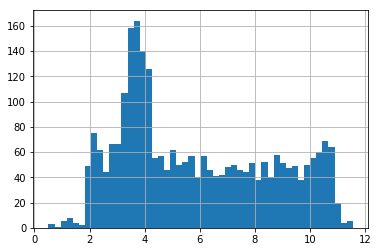


target 1 12.6407394841
45
0.07614692227705017 6.486262690852971 6.44567259670659


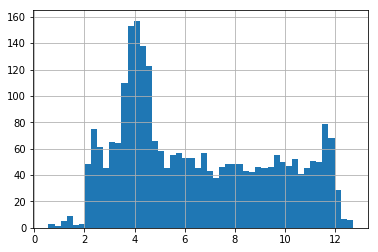


target 2 11.6683749084
30
0.07230695382032759 5.988919986818421 5.9509232121761295


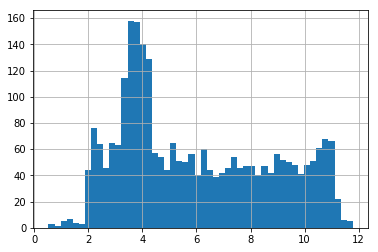


target 3 7.0496431738
30
0.044084502636940845 3.6134984643190893 3.5905718083834564


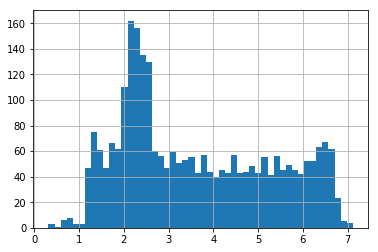


target 4 11.4252837645
30
0.07277514160989285 5.860214797440478 5.823514987170547


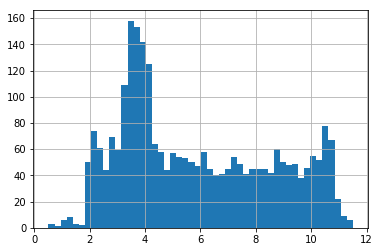


target 5 16.5301977869
30
0.09990244143334542 8.483533378535887 8.429485270892886


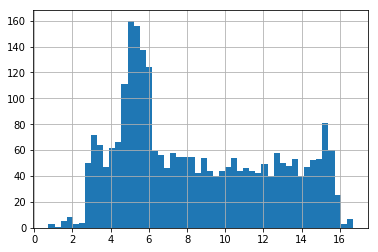


target 6 9.723645757
30
0.06035659264515899 4.988169171334387 4.95605805239811


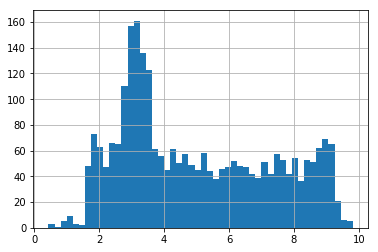


target 7 12.6407394841
30
0.07945587799525246 6.4847158662559465 6.441837906732478


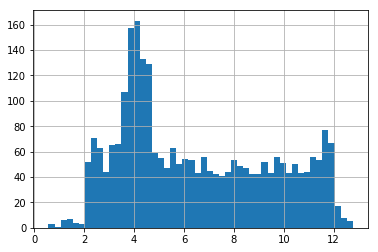


target 8 16.5301977869
30
0.10063169812546004 8.485268072138588 8.431115682209166


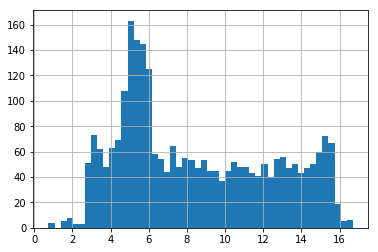

In [138]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [156]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.410203821123324 5.7043935805578085


In [157]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.3693300443297245 5.705224991820655
